In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import pickle

In [2]:

df = pd.read_csv('dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

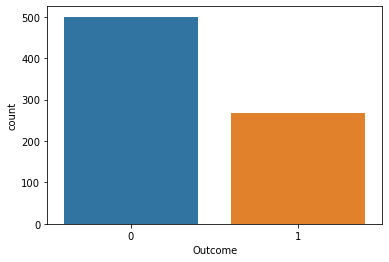

In [9]:
sns.countplot(x ='Outcome', data = df)

In [10]:
# Percentage of patients have and do not have dibetices
df['Outcome'].value_counts()/df.shape[0]*100 


0    65.104167
1    34.895833
Name: Outcome, dtype: float64

[500 268]


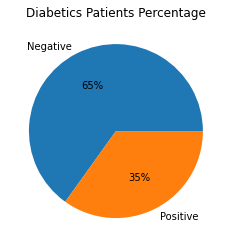

In [11]:
# Create a plot to display the percentage of the positive and negative diabeticse 
labels = ['Negative','Positive']
values = df['Outcome'].value_counts().values
print(values)
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Diabetics Patients Percentage')
plt.show()

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



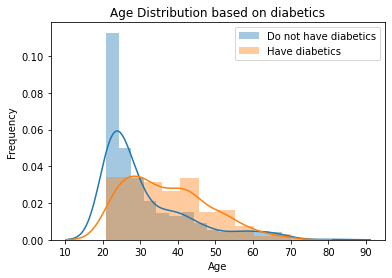

In [12]:
# Display age distribution based on diabetics
sns.distplot(df[df['Outcome'] == 0]['Age'], label='Do not have diabetics')
sns.distplot(df[df['Outcome'] == 1]['Age'], label = 'Have diabetics')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution based on diabetics')
plt.legend()
plt.show()

In [13]:
# nb = df['Outcome'].value_counts(0)
# b = df['Outcome'].value_counts(1)
# print(nb)
# print(b)

In [14]:
# Get min, max and average of the age
print('Min age: ', min(df['Age']))
print('Max age: ', max(df['Age']))
print('Average age: ', df['Age'].mean())

Min age:  21
Max age:  81
Average age:  33.240885416666664


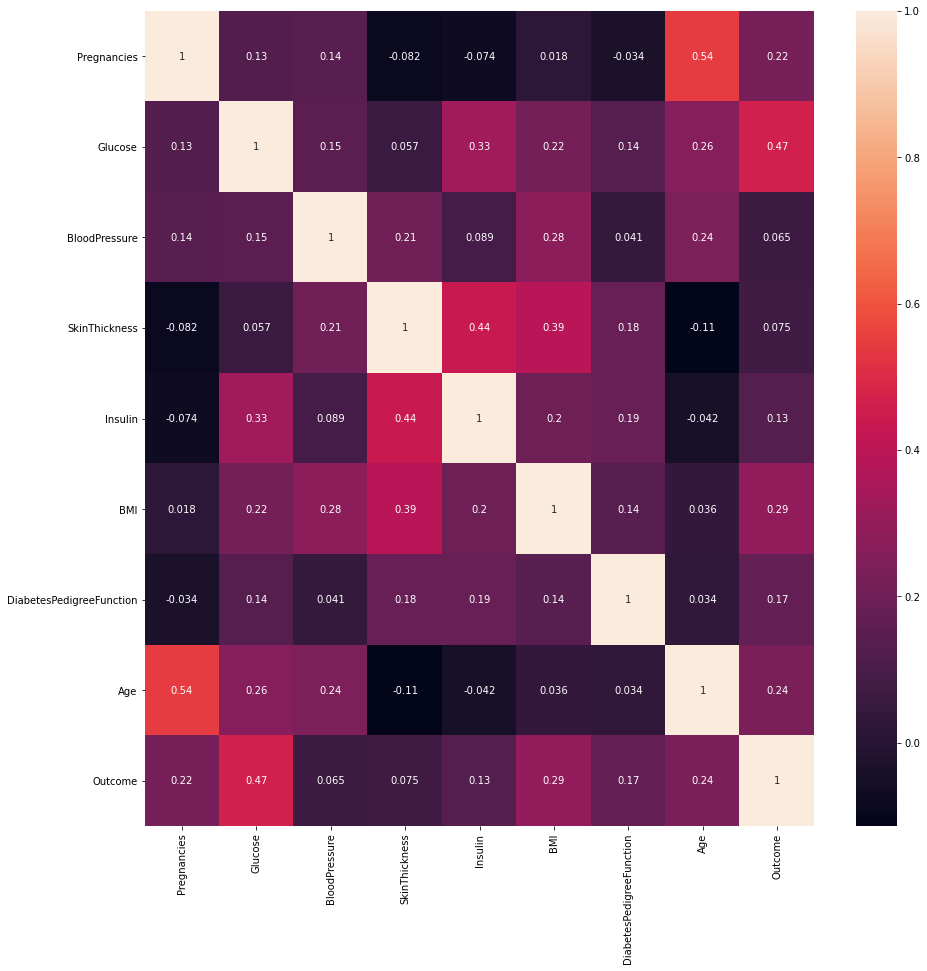

In [15]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True) 
plt.show()

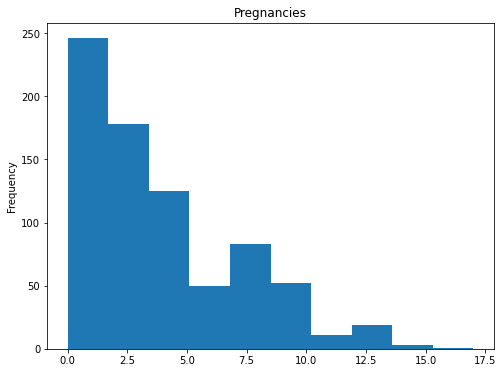

In [16]:
# Display Pregnancies distribution
df['Pregnancies'].plot(kind = 'hist', title = 'Pregnancies', figsize = (8, 6))
plt.show()

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



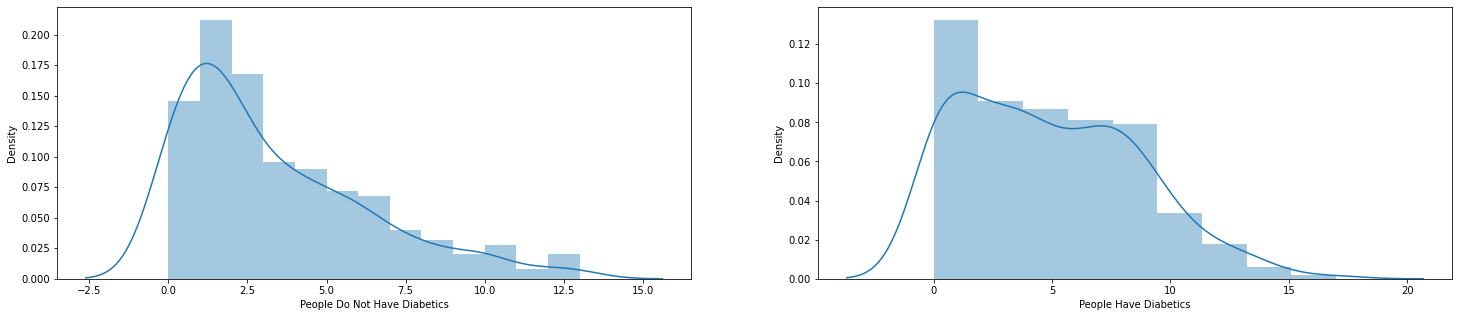

In [17]:
# Display Pregnancies distribution based on Diabetics
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))

ax = sns.distplot(df[df['Outcome'] == 0]['Pregnancies'], label='Do not have Diabetics', ax = axis1)
ax.set(xlabel='People Do Not Have Diabetics')

ax = sns.distplot(df[df['Outcome'] == 1]['Pregnancies'], label = 'Have Diabetics', ax = axis2)
ax.set(xlabel='People Have Diabetics')

plt.show()

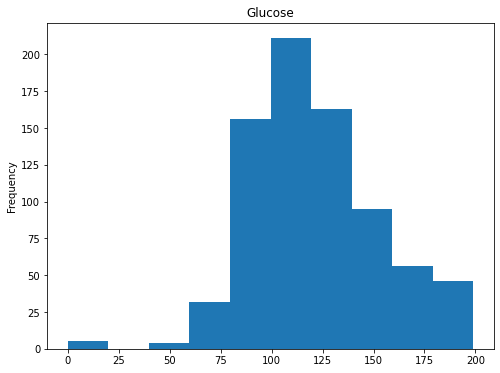

In [18]:
# Display Glucose distribution
df['Glucose'].plot(kind = 'hist', title = 'Glucose', figsize = (8, 6))
plt.show()

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



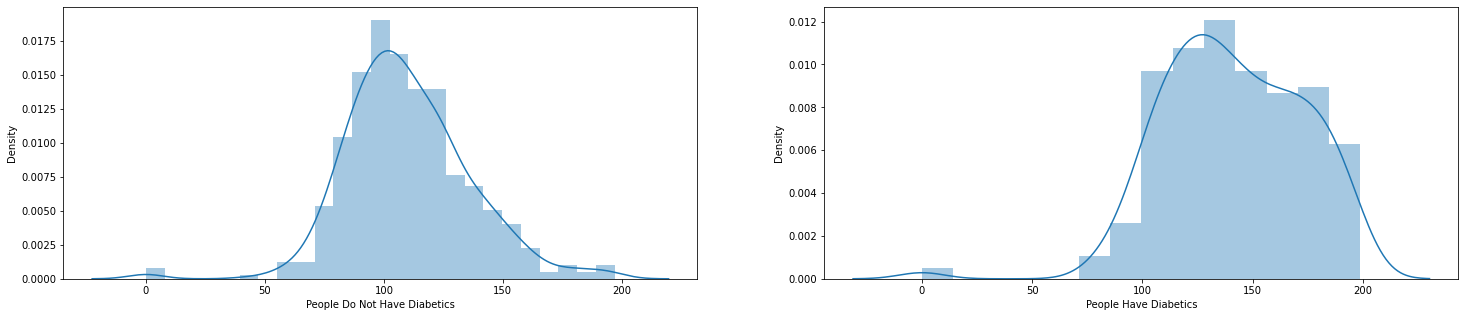

In [19]:
# Display Glucose distribution based on Diabetics
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['Outcome'] == 0]['Glucose'], label='Do not have Diabetics', ax = axis1)
ax.set(xlabel='People Do Not Have Diabetics')
ax = sns.distplot(df[df['Outcome'] == 1]['Glucose'], label = 'Have Diabetics', ax = axis2)
ax.set(xlabel='People Have Diabetics')
plt.show()

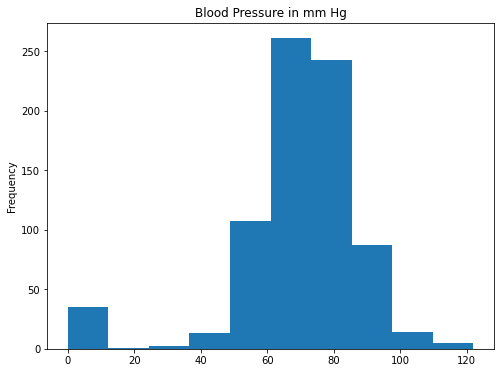

In [20]:
# Display blood pressure distribution
df['BloodPressure'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



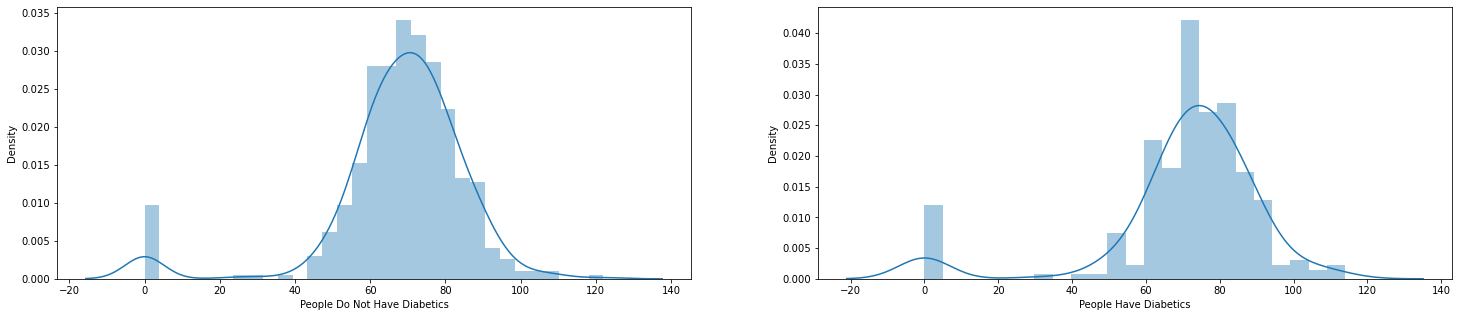

In [21]:
# Display BloodPressure distribution based on Diabetics
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))

ax = sns.distplot(df[df['Outcome'] == 0]['BloodPressure'], label='Do not have Diabetics', ax = axis1)
ax.set(xlabel='People Do Not Have Diabetics')

ax = sns.distplot(df[df['Outcome'] == 1]['BloodPressure'], label = 'Have Diabetics', ax = axis2)
ax.set(xlabel='People Have Diabetics')

plt.show()

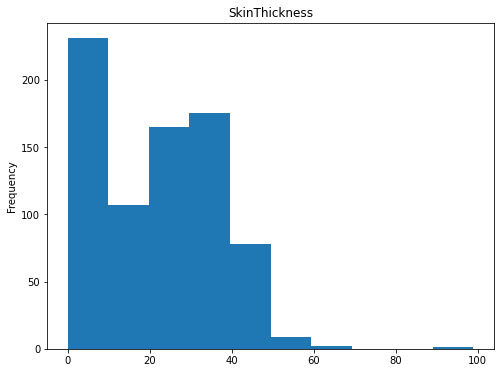

In [22]:
# Display SkinThickness distribution
df['SkinThickness'].plot(kind = 'hist', title = 'SkinThickness', figsize = (8, 6))
plt.show()

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



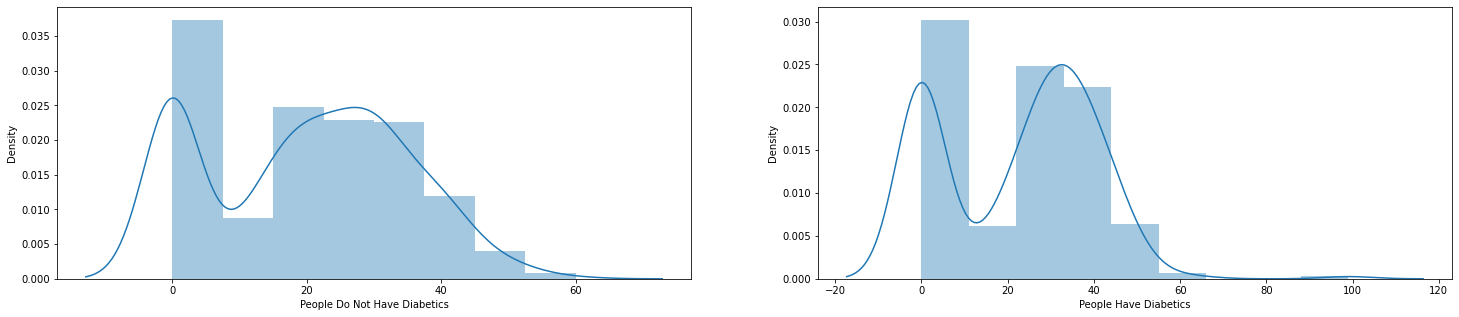

In [23]:
# Display SkinThickness distribution based on Diabetics
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))

ax = sns.distplot(df[df['Outcome'] == 0]['SkinThickness'], label='Do not have Diabetics', ax = axis1)
ax.set(xlabel='People Do Not Have Diabetics')
ax = sns.distplot(df[df['Outcome'] == 1]['SkinThickness'], label = 'Have Diabetics', ax = axis2)
ax.set(xlabel='People Have Diabetics')

plt.show()

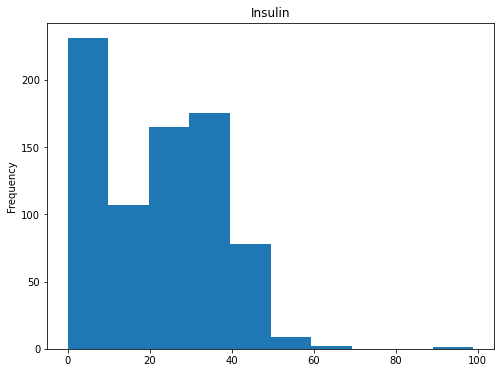

In [24]:
# Display Insulin distribution
df['SkinThickness'].plot(kind = 'hist', title = 'Insulin', figsize = (8, 6))
plt.show()

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



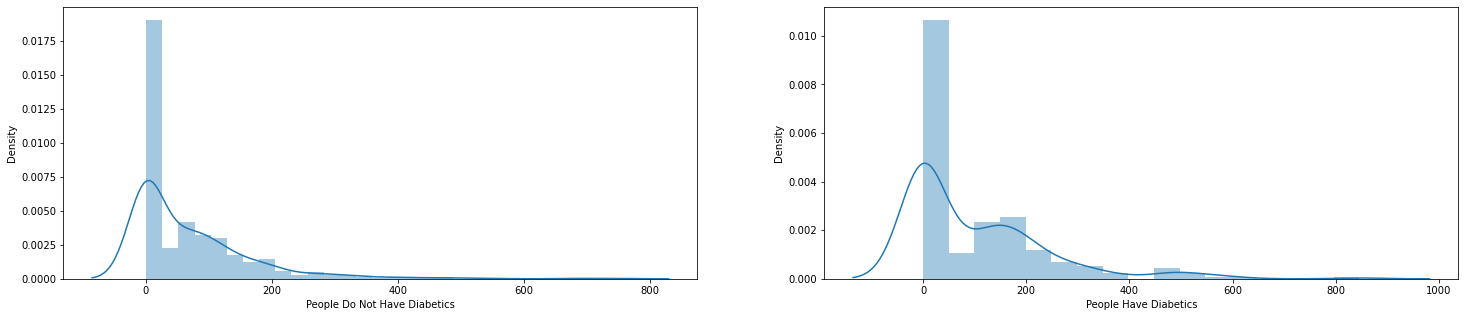

In [25]:
# Display Insulin distribution based on Diabetics

fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))

ax = sns.distplot(df[df['Outcome'] == 0]['Insulin'], label='Do not have Diabetics', ax = axis1)
ax.set(xlabel='People Do Not Have Diabetics')

ax = sns.distplot(df[df['Outcome'] == 1]['Insulin'], label = 'Have Diabetics', ax = axis2)
ax.set(xlabel='People Have Diabetics')

plt.show()

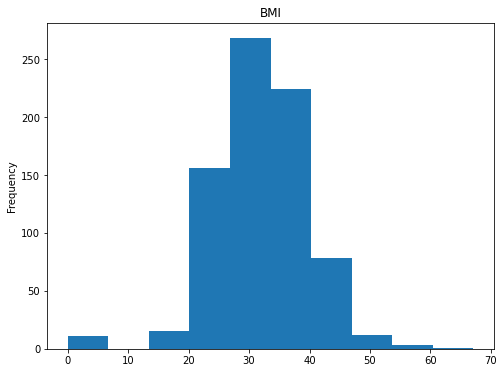

In [26]:
# Display BMI distribution
df['BMI'].plot(kind = 'hist', title = 'BMI', figsize = (8, 6))
plt.show()

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



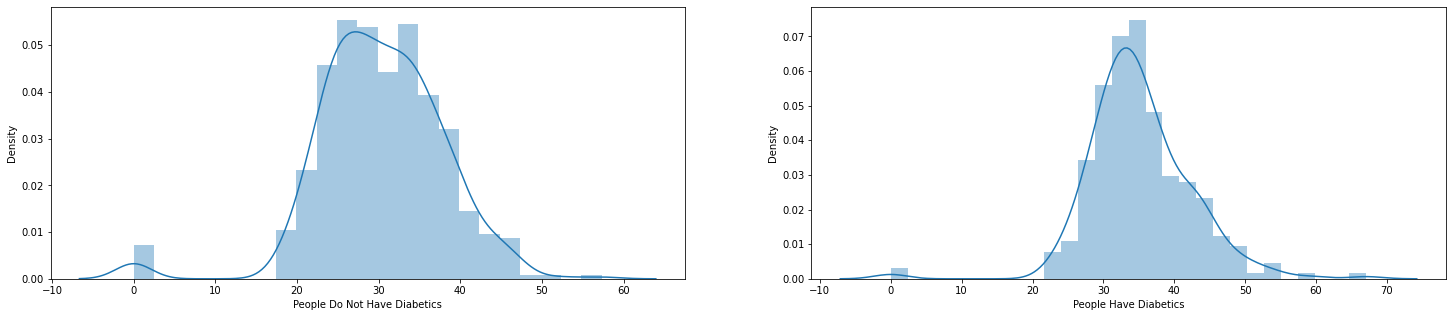

In [27]:
# Display BMI distribution based on Diabetics

fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))

ax = sns.distplot(df[df['Outcome'] == 0]['BMI'], label='Do not have Diabetics', ax = axis1)
ax.set(xlabel='People Do Not Have Diabetics')

ax = sns.distplot(df[df['Outcome'] == 1]['BMI'], label = 'Have Diabetics', ax = axis2)
ax.set(xlabel='People Have Diabetics')

plt.show()

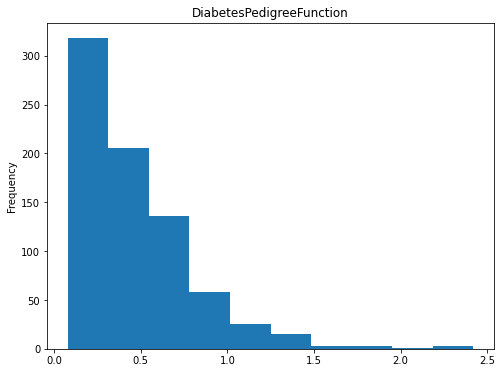

In [28]:
# Display DiabetesPedigreeFunction distribution
df['DiabetesPedigreeFunction'].plot(kind = 'hist', title = 'DiabetesPedigreeFunction', figsize = (8, 6))
plt.show()

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



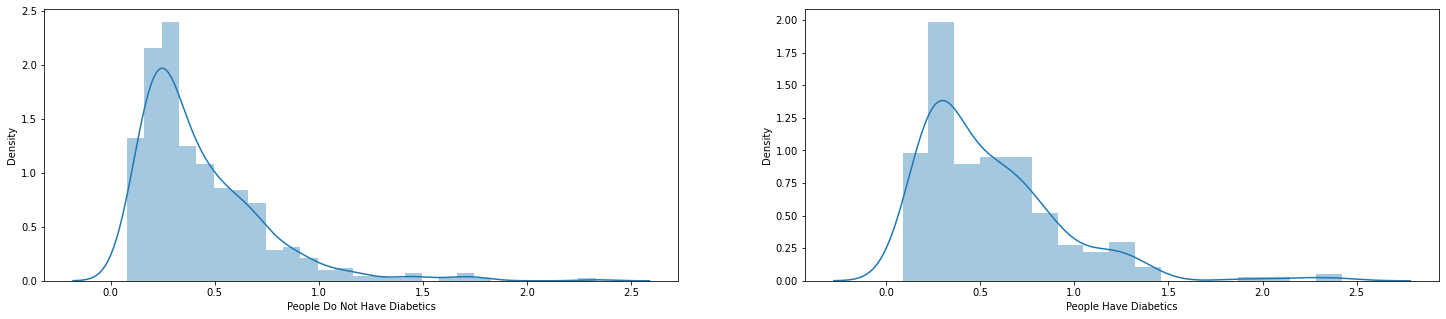

In [29]:
# Display DiabetesPedigreeFunction distribution based on Diabetics

fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))

ax = sns.distplot(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'], label='Do not have Diabetics', ax = axis1)
ax.set(xlabel='People Do Not Have Diabetics')

ax = sns.distplot(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'], label = 'Have Diabetics', ax = axis2)
ax.set(xlabel='People Have Diabetics')

plt.show()

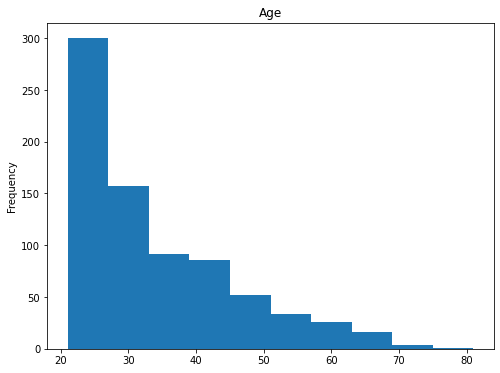

In [30]:
# Display Age distribution
df['Age'].plot(kind = 'hist', title = 'Age', figsize = (8, 6))
plt.show()

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



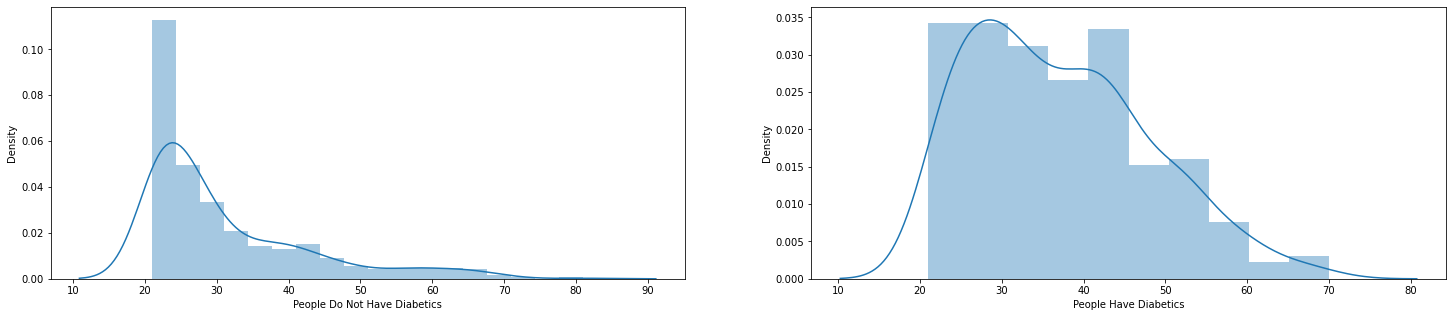

In [31]:
# Display Age distribution based on Diabetics

fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))

ax = sns.distplot(df[df['Outcome'] == 0]['Age'], label='Do not have Diabetics', ax = axis1)
ax.set(xlabel='People Do Not Have Diabetics')

ax = sns.distplot(df[df['Outcome'] == 1]['Age'], label = 'Have Diabetics', ax = axis2)
ax.set(xlabel='People Have Diabetics')

plt.show()

In [32]:
# data_3 = data_2.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
# data_3 = data_2.drop('Unnamed: 0', axis=1)
# Initialize data and outcome
target = df['Outcome']

features = df.drop(columns=['Outcome'], axis=1)
# features = df.drop('Outcome', axis = 1)




In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [36]:
# print(X_train)

In [37]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
    # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [38]:
# Initialize the models
sv = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()


# Fit and evaluate models
results = {}
for cls in [sv,rf,knn,nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    
    


In [39]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('----------------------------------------------------')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154


confusion_matrix :
[[98  9]
 [23 24]]

----------------------------------------------------

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154


confusion_matrix :
[[95 12]
 [18 29]]

----------------------------------------------------

KNeighborsClassifier

classification_report :
              precision    recall  

In [40]:
input_data = (7,196,90,0,0,39.8,0.451,41) #must input 8 parameters

# changing input data to a numpy array
numpy_array = np.asarray(input_data)

# change the input data to a numpy array
numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = numpy_array.reshape(1,-1)

prediction = cls.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Diabetes')
else:
  print('The Person has Diabetes')

[1]
The Person has Diabetes


In [41]:
if(prediction[0]==1):
    if(numpy_array[7]<35 and numpy_array[1]<100):
        print("The person has in type 1")
    elif(numpy_array[7]>=35 and numpy_array[1]>=100 and numpy_array[1]<190):
        print("The person has in type 2")
    elif(numpy_array[1]>=190):
        print("The person has in type 3")

The person has in type 3
